In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
%matplotlib inline

In [2]:
# sudo apt-get install graphviz

In [3]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot_ng as pydot

def plot_dtc(clf, features, classes):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                             feature_names=features,  
                             class_names=classes,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png()) 
    
plot_dtc(clf, iris.feature_names, iris.target_names)

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydot_ng'

In [5]:
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

X = iris["data"]
y = (iris["target"] != 2)

paramgrid = {"max_features":      [1, 2, 3],
             "max_depth":         [3, 5, 7, 10],
             "min_samples_split": [2, 5, 10]
            }

random.seed(1)

from evolutionary_search import EvolutionaryAlgorithmSearchCV
cv = EvolutionaryAlgorithmSearchCV(estimator            =  DecisionTreeClassifier(),
                                   params               =  paramgrid,
                                   scoring              =  "roc_auc",
                                   cv                   =  StratifiedKFold(y, n_folds=4),
                                   verbose              = 1,
                                   population_size      = 10,
                                   gene_mutation_prob   = 0.2,
                                   gene_crossover_prob  = 0.5,
                                   tournament_size      = 5,
                                   generations_number   = 5,
                                   n_jobs=4)
%time cv.fit(X, y)

ModuleNotFoundError: No module named 'evolutionary_search'

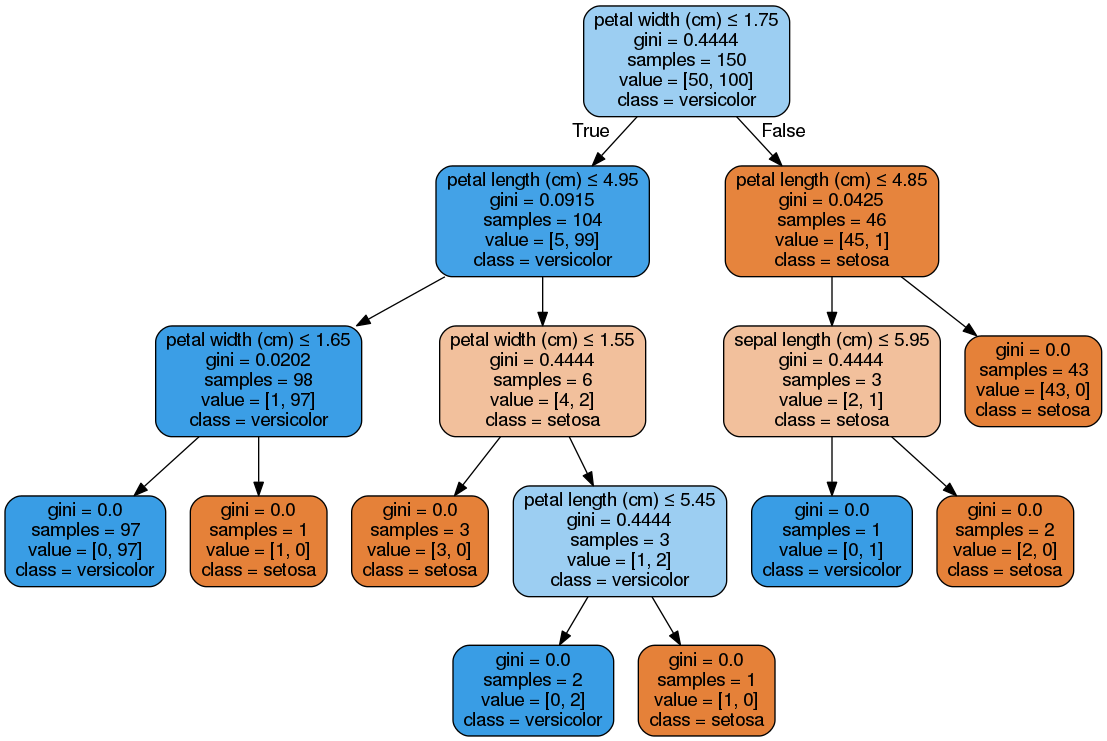

In [26]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
plot_dtc(clf)

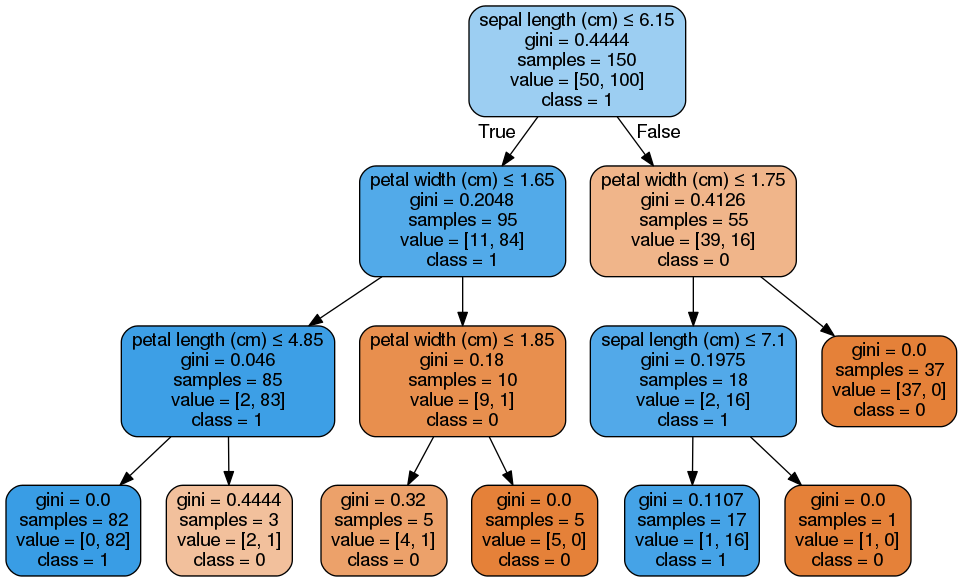

In [29]:
clf = tree.DecisionTreeClassifier()
clf.set_params(**{'min_samples_split': 2, 'max_features': 1, 'max_depth': 3})
clf = clf.fit(iris.data, iris.target !=2)
plot_dtc(clf, iris.feature_names, ["0", "1"])